# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [8]:
!rm -rf EDA
! git clone https://github.com/quentinshin34/EDA.git


Cloning into 'EDA'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 69 (delta 15), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (69/69), 11.23 MiB | 23.32 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "EDA/assignment/data/ForeignGifts_edu.csv"
df = pd.read_csv(file_path)
print(df.head())


   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  

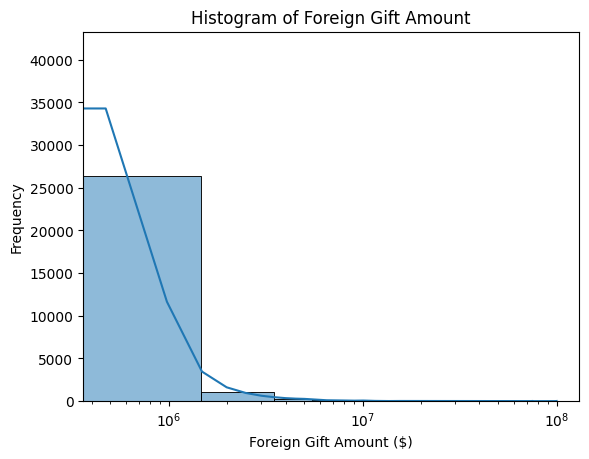

In [25]:
# 2.2
# histogram of foreign gift amount
plt.figure()
sns.histplot(df["Foreign Gift Amount"], bins=50, kde=True)
plt.xlabel("Foreign Gift Amount ($)")
plt.ylabel("Frequency")
plt.title("Histogram of Foreign Gift Amount")
plt.xscale("log")  # Log scale for better visualization
plt.show()



2.1: The foreign gift amounts are very skewed right, with only a few very large gifts, most gifts are under 100 million.

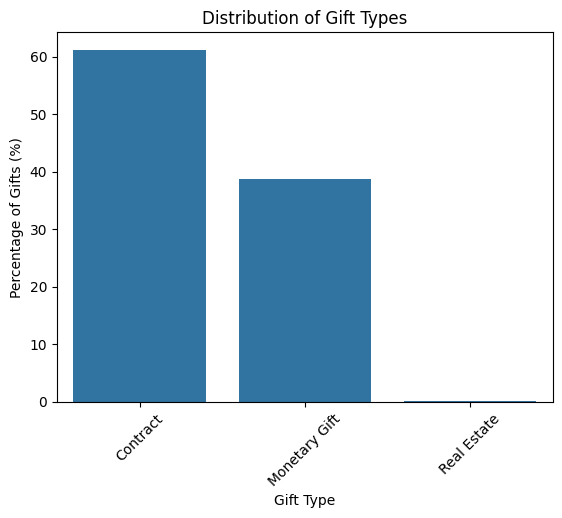

Gift Type
Contract         61.209737
Monetary Gift    38.751285
Real Estate       0.038978
Name: proportion, dtype: float64


In [26]:
# 2.3
# Count and proportion of gift types
gift_type_counts = df["Gift Type"].value_counts(normalize=True) * 100

sns.barplot(x=gift_type_counts.index, y=gift_type_counts.values)
plt.ylabel("Percentage of Gifts (%)")
plt.xlabel("Gift Type")
plt.title("Distribution of Gift Types")
plt.xticks(rotation=45)
plt.show()

print(gift_type_counts)


2.3:

Contract: 61.21%
Monetary Gift: 38.75%
Real Estate: 0.04%

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


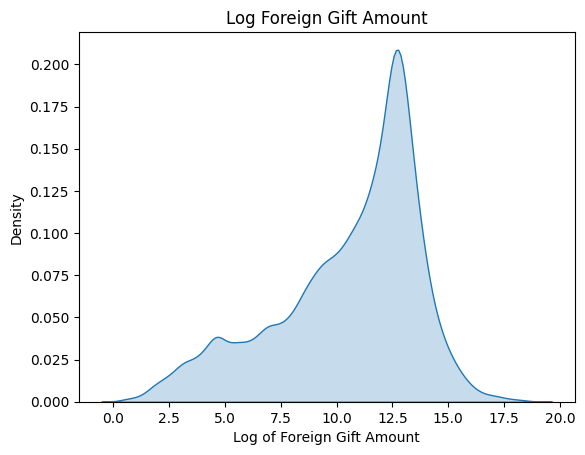

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


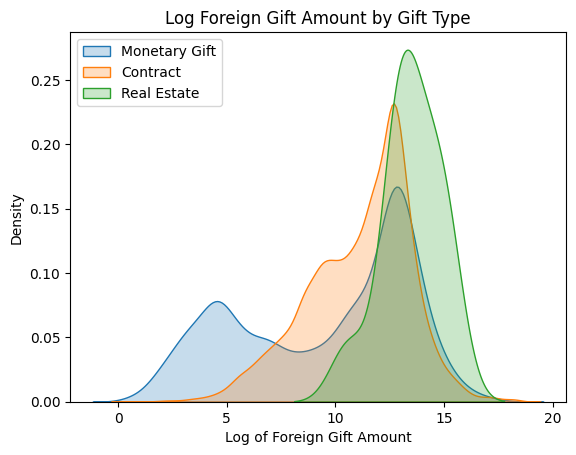

In [29]:
# 2.4
# Kernel Density Plot of Log Foreign Gift Amount
sns.kdeplot(np.log1p(df["Foreign Gift Amount"]), fill=True)
plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Density")
plt.title("Log Foreign Gift Amount")
plt.show()

# Kernel Density Plot for different Gift Types
for gift_type in df["Gift Type"].unique():
    sns.kdeplot(np.log1p(df[df["Gift Type"] == gift_type]["Foreign Gift Amount"]), fill=True, label=gift_type)

plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Density")
plt.title("Log Foreign Gift Amount by Gift Type")
plt.legend()
plt.show()


2.4:

The real estate have the highest average, highest peak, and smallest range. Contracts and monetary gifts have a much wider range and smaller peaks, likely because they have many more values -- question 2.2

In [30]:
# 2.5
# Top 15 countries by number of gifts
top_countries_by_count = df["Country of Giftor"].value_counts().head(15)

# Top 15 countries by total gift amount
top_countries_by_amount = df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().nlargest(15)

# Display results
print("Top 15 Countries by Number of Gifts:")
print(top_countries_by_count)

print("\nTop 15 Countries by Total Amount Given:")
print(top_countries_by_amount)


Top 15 Countries by Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 Countries by Total Amount Given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA 

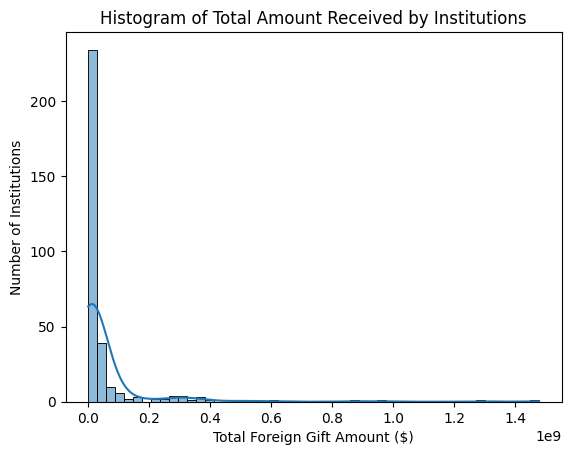

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


In [34]:
# 2.6
# Top 15 institutions by total received amount
top_institutions = df.groupby("Institution Name")["Foreign Gift Amount"].sum().nlargest(15)

sns.histplot(df.groupby("Institution Name")["Foreign Gift Amount"].sum(), bins=50, kde=True)
plt.xlabel("Total Foreign Gift Amount ($)")
plt.ylabel("Number of Institutions")
plt.title("Histogram of Total Amount Received by Institutions")
plt.show()

print(top_institutions)


In [31]:
# 2.7
# Top giftors by total money given
top_giftors = df.groupby("Giftor Name")["Foreign Gift Amount"].sum().nlargest(15)

print(top_giftors)


Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
rigs = "EDA/assignment/data/drilling_rigs.csv"
df_rigs = pd.read_csv(rigs)

In [70]:
# Convert 'Month' column to datetime format
df_rigs['Month'] = pd.to_datetime(df_rigs['Month'], format='%Y %B', errors='coerce')

# Replace "Not Available" with NaN and convert to numeric
df_rigs.replace("Not Available", np.nan, inplace=True)
cols_to_convert = df_rigs.columns[1:]
df_rigs[cols_to_convert] = df_rigs[cols_to_convert].apply(pd.to_numeric, errors='coerce')


df_rigs.rename(columns={
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)": "Onshore Rigs",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)": "Offshore Rigs",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)": "Total Rigs",
    "Active Well Service Rig Count (Number of Rigs)": "Active Rigs"
}, inplace=True)

# dataset information
num_observations, num_variables = df_rigs.shape
print(f"Number of Observations: {num_observations}, Number of Variables: {num_variables}")

Number of Observations: 623, Number of Variables: 10


The not available need to be converted to NaN. The month column needs to be converted into date time format. Columns with numbers need to be converted properly after cleaning. Column names can be shorter and simpler.


623 observations, 10 variables

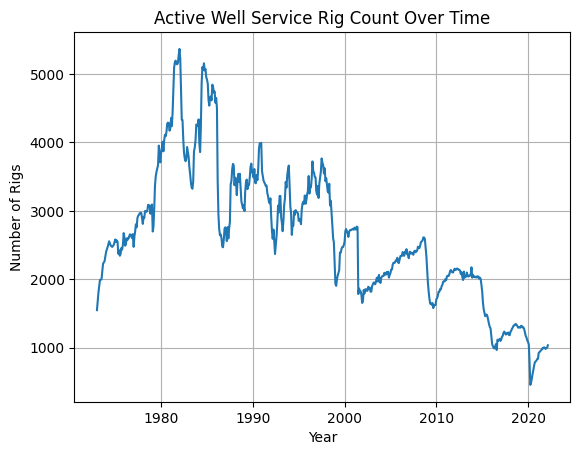

In [71]:
# Plot Active Well Service Rig Count over time
sns.lineplot(x=df_rigs["Month"], y=df_rigs["Active Rigs"])
plt.xlabel("Year")
plt.ylabel("Number of Rigs")
plt.title("Active Well Service Rig Count Over Time")
plt.grid(True)
plt.show()

Over time, the number of active well service rigs has fluctuated, likely displaying different trends and rig policies at that particular time. The number of active rigs peaked in the mid 1980s and has been on a gradually decreasing trend since then. The record low was in 2020, which could be a result of the covid pandemic.

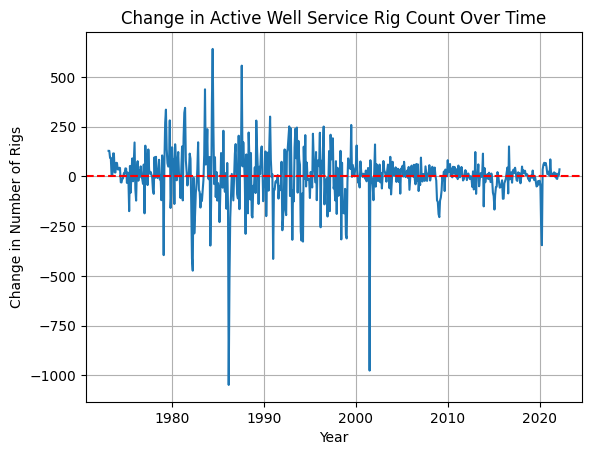

In [72]:
df_rigs["Rig Count Change"] = df_rigs["Active Rigs"].diff()

# Plot the first difference
sns.lineplot(x=df_rigs["Month"], y=df_rigs["Rig Count Change"])
plt.axhline(0, color='red', linestyle='--')  # Reference line at 0
plt.xlabel("Year")
plt.ylabel("Change in Number of Rigs")
plt.title("Change in Active Well Service Rig Count Over Time")
plt.grid(True)
plt.show()

The number of active well services has increased and decreased between years since the data has been recorded, showing rapid changes in the well industry. Between 1980 and 2000 and year-to-year changes were much greater. There were two large decreases of about 1000 in about 1986 and 2002. There were two large increases in the 1980s of about 500. After 2000, the year to year changes were much smaller, showing more consistency in the active wells. There was a smaller decrease in 2020, likely due to the covid pandemic.

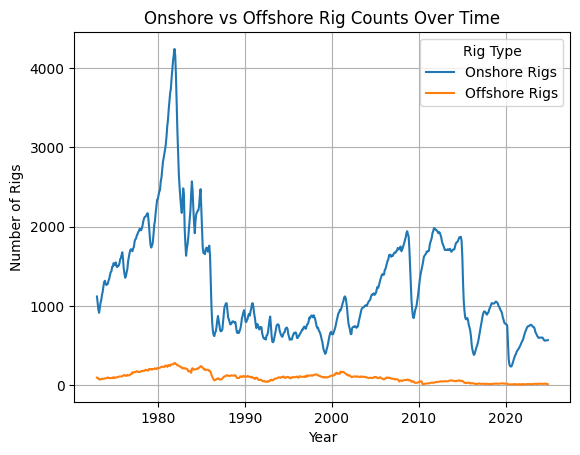

In [73]:
# Melt Onshore and Offshore Rig Counts
df_melted = df_rigs.melt(id_vars=["Month"],
                         value_vars=[
                             "Onshore Rigs",
                             "Offshore Rigs"
                         ],
                         var_name="Rig Type",
                         value_name="Rig Count")


# Plot the onshore vs offshore rig counts over time
sns.lineplot(data=df_melted, x="Month", y="Rig Count", hue="Rig Type")
plt.xlabel("Year")
plt.ylabel("Number of Rigs")
plt.title("Onshore vs Offshore Rig Counts Over Time")
plt.legend(title="Rig Type")
plt.grid(True)
plt.show()
